In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv
/kaggle/input/a-credit-card-dataset-for-machine-exam/credit_record.csv
/kaggle/input/a-credit-card-dataset-for-machine-exam/application_record.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# **Exploring Data**

In [3]:
credit_record_df = pd.read_csv('/kaggle/input/credit-card-approval-prediction/credit_record.csv')
credit_record_df.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [4]:
application_record_df = pd.read_csv('/kaggle/input/credit-card-approval-prediction/application_record.csv')
application_record_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


#### Size of Data

In [5]:
print(f'Credit data have {credit_record_df.shape[0]} rows , {credit_record_df.shape[1]} columns.')
print(f'Application data have {application_record_df.shape[0]} rows , {application_record_df.shape[1]} columns.')

Credit data have 1048575 rows , 3 columns.
Application data have 438557 rows , 18 columns.


#### Cecking NULL values

In [6]:
print('Credit data null values:')
print(credit_record_df.isnull().sum())
print('Application data null values:')
print(application_record_df.isnull().sum())

Credit data null values:
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
Application data null values:
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64


#### Checking Data Types

In [7]:
credit_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
application_record_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

# **Relationships between Columns**

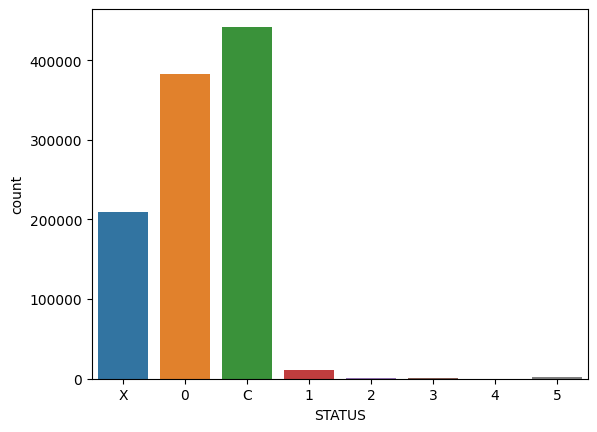

In [9]:
sns.countplot(x='STATUS', data=credit_record_df)
plt.show()

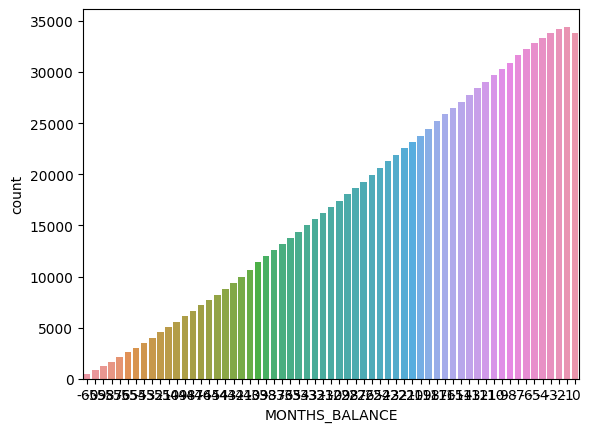

In [10]:
sns.countplot(x='MONTHS_BALANCE', data=credit_record_df)
plt.show()

In [11]:
credit_record_df.MONTHS_BALANCE.nunique()

61

In [12]:
credit_record_df.MONTHS_BALANCE.min()

-60

In [13]:
#credit_record_df['MONTHS_BALANCE'].groupby(credit_record_df['STATUS']).median()
credit_record_df['MONTHS_BALANCE'].groupby(credit_record_df['STATUS']).agg(pd.Series.mode)

STATUS
0           -3
1           -4
2    [-18, -3]
3    [-17, -2]
4           -1
5            0
C            0
X            0
Name: MONTHS_BALANCE, dtype: object

<Axes: xlabel='STATUS', ylabel='count'>

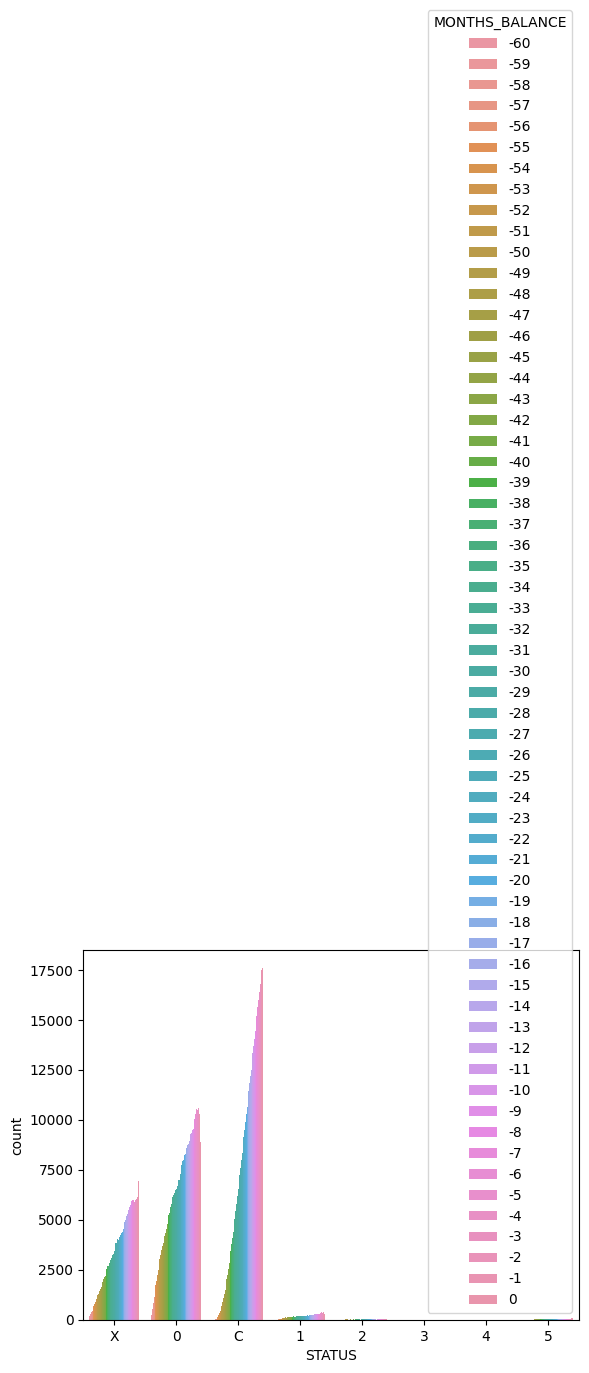

In [14]:
sns.countplot(data=credit_record_df,x='STATUS', hue=credit_record_df['MONTHS_BALANCE'])

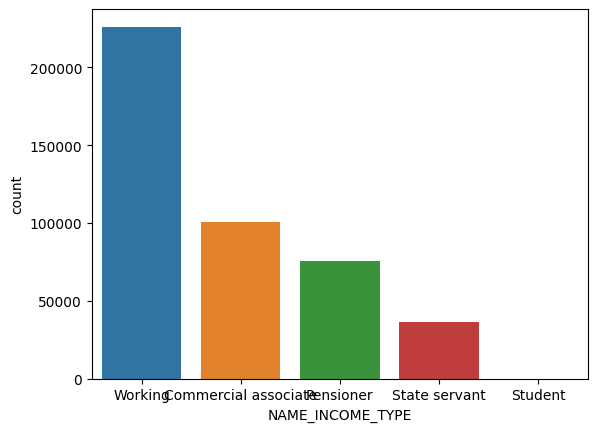

In [15]:
sns.countplot(x='NAME_INCOME_TYPE', data=application_record_df)
plt.show()

In [16]:
credit_record_df['Good or Bad'] = ['Good' if x in set(['0','X','C']) else 'Bad' for x in credit_record_df['STATUS']]
credit_record_df

,ID,MONTHS_BALANCE,STATUS,Good or Bad
0,5001711,0,X,Good
1,5001711,-1,0,Good
2,5001711,-2,0,Good
3,5001711,-3,0,Good
4,5001712,0,C,Good
...,...,...,...,...
1048570,5150487,-25,C,Good
1048571,5150487,-26,C,Good
1048572,5150487,-27,C,Good
1048573,5150487,-28,C,Good


In [17]:
credit_goods_bads = credit_record_df.groupby(['ID','Good or Bad']).size().to_frame('size')
credit_goods_bads.reset_index(inplace=True)
credit_goods_bads

,ID,Good or Bad,size
0,5001711,Good,4
1,5001712,Good,19
2,5001713,Good,22
3,5001714,Good,15
4,5001715,Good,60
...,...,...,...
51329,5150482,Good,18
51330,5150483,Good,18
51331,5150484,Good,13
51332,5150485,Good,2


In [18]:
idx = credit_goods_bads.groupby('ID')['size'].idxmax()
max_goods_bads = credit_goods_bads.loc[idx]
max_goods_bads

,ID,Good or Bad,size
0,5001711,Good,4
1,5001712,Good,19
2,5001713,Good,22
3,5001714,Good,15
4,5001715,Good,60
...,...,...,...
51329,5150482,Good,18
51330,5150483,Good,18
51331,5150484,Good,13
51332,5150485,Good,2


In [19]:
max_goods_bads['Label'] = [1 if x == 'Good' else 0 for x in max_goods_bads['Good or Bad']]
max_goods_bads

,ID,Good or Bad,size,Label
0,5001711,Good,4,1
1,5001712,Good,19,1
2,5001713,Good,22,1
3,5001714,Good,15,1
4,5001715,Good,60,1
...,...,...,...,...
51329,5150482,Good,18,1
51330,5150483,Good,18,1
51331,5150484,Good,13,1
51332,5150485,Good,2,1


In [20]:
max_goods_bads = max_goods_bads.drop(['Good or Bad', 'size'], axis=1)
max_goods_bads = max_goods_bads.reset_index(drop=True)
max_goods_bads

,ID,Label
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
...,...,...
45980,5150482,1
45981,5150483,1
45982,5150484,1
45983,5150485,1


#### **Time to join data**

In [21]:
# filling OCCUPATION_TYPE in application data
application_record_df.fillna('Unknown', inplace=True)

In [22]:
len(set(application_record_df['ID']).intersection(set(max_goods_bads['ID'])))

36457

In [23]:
data = pd.merge(application_record_df, max_goods_bads, how='inner', on='ID')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,1


# **Preprocessing**

## **Feature Selection**

In [24]:
X = data.drop('Label', axis=1)
y = data['Label']
X

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0


### **Mutual Information**

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [26]:
X_info = X.copy()

# Label encoding for categoricals
for colname in X_info.select_dtypes("object"):
    X_info[colname], _ = X_info[colname].factorize()

# Converting floats to ints
for colname in X_info.select_dtypes("float"):
    X_info[colname] = X_info[colname].astype(int)

# Converting bools to ints
#for colname in X_info.select_dtypes("bool"):
#    X_info[colname] = X_info[colname].astype(int)

# All discrete features should now have integer dtypes
discrete_features = X_info.dtypes != int

In [27]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_info, y, discrete_features)
mi_scores

DAYS_BIRTH             0.004512
FLAG_MOBIL             0.003971
NAME_HOUSING_TYPE      0.003634
AMT_INCOME_TOTAL       0.002958
CNT_FAM_MEMBERS        0.002582
FLAG_OWN_REALTY        0.001695
NAME_INCOME_TYPE       0.000822
FLAG_WORK_PHONE        0.000499
NAME_FAMILY_STATUS     0.000160
CNT_CHILDREN           0.000000
NAME_EDUCATION_TYPE    0.000000
CODE_GENDER            0.000000
DAYS_EMPLOYED          0.000000
FLAG_OWN_CAR           0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.000000
ID                     0.000000
Name: MI Scores, dtype: float64

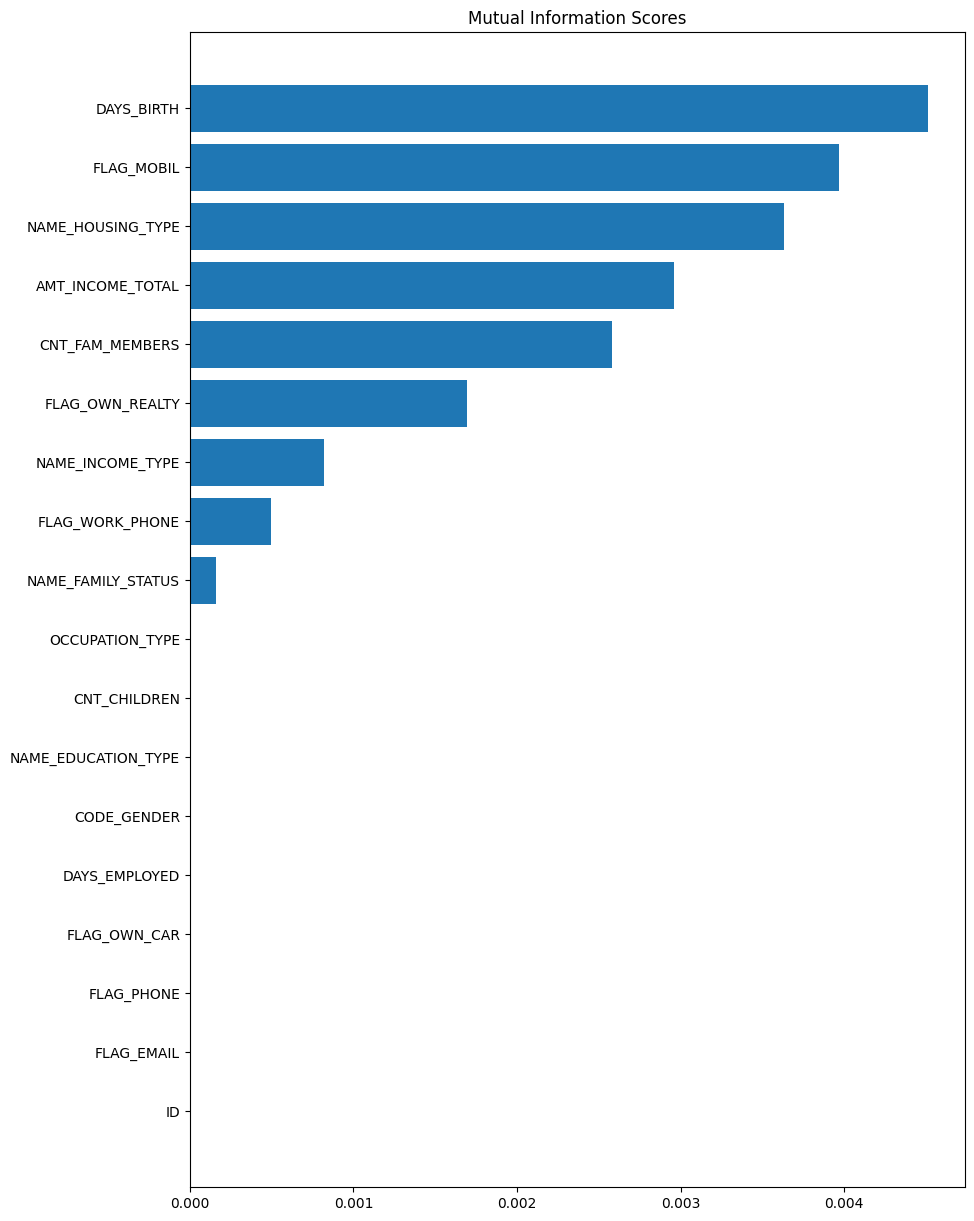

In [28]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 15))
plot_mi_scores(mi_scores)

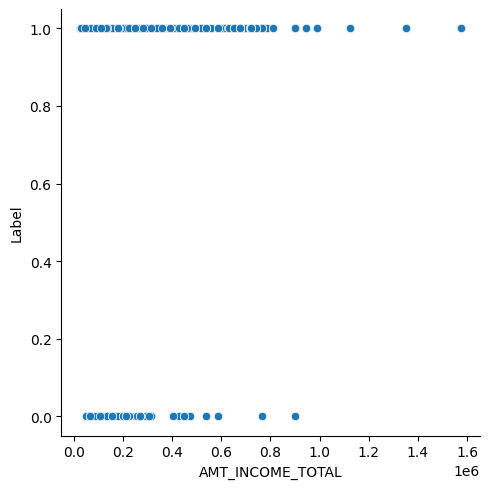

In [29]:
sns.relplot(x="AMT_INCOME_TOTAL", y="Label", data=data);

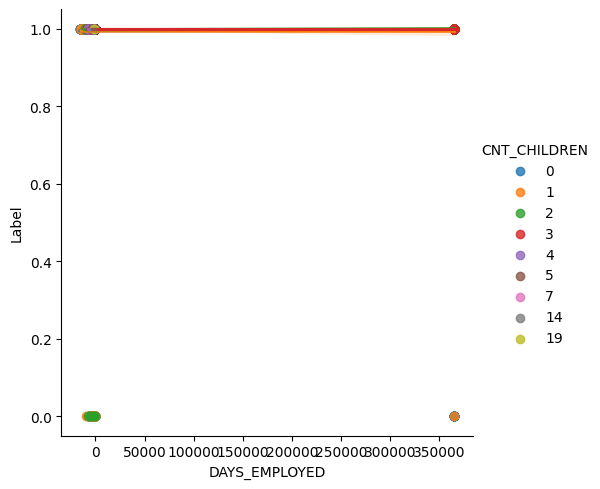

In [30]:
sns.lmplot(x="DAYS_EMPLOYED", y="Label", hue="CNT_CHILDREN", data=data);

<Axes: xlabel='OCCUPATION_TYPE', ylabel='Label'>

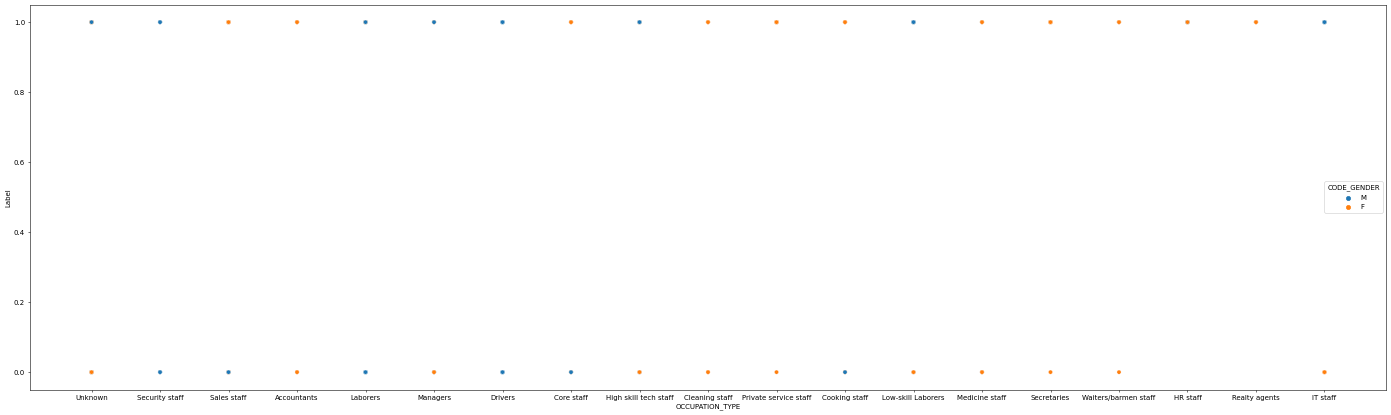

In [31]:
#sns.lmplot(x="CODE_GENDER", y=y, hue="FLAG_OWN_REALTY", data=X_info);
plt.figure(dpi=50, figsize=(35, 10))
sns.scatterplot(x=data['OCCUPATION_TYPE'], y=data['Label'], hue=data['CODE_GENDER'])

## **Covert Categorical Data To Numerical**

In [32]:
X = pd.get_dummies(X, drop_first=True) 
X

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Unknown,OCCUPATION_TYPE_Waiters/barmen staff
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0,...,False,False,False,False,False,False,False,False,True,False
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0,...,False,False,False,False,False,False,False,True,False,False
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,315000.0,-17348,-2420,1,0,0,0,2.0,...,False,True,False,False,False,False,False,False,False,False
36453,5149834,0,157500.0,-12387,-1325,1,0,1,1,2.0,...,False,False,True,False,False,False,False,False,False,False
36454,5149838,0,157500.0,-12387,-1325,1,0,1,1,2.0,...,False,False,True,False,False,False,False,False,False,False
36455,5150049,0,283500.0,-17958,-655,1,0,0,0,2.0,...,False,False,False,False,False,True,False,False,False,False


## **Splitting the Data**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Scalling the Data**

In [34]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Normalized input data(X):\n", X_train_scaled)

Normalized input data(X):
 [[-0.98470504 -0.58068211 -0.51169961 ... -0.12714828 -0.66952
  -0.06613304]
 [-0.80341846  0.7672639  -0.51169961 ... -0.12714828 -0.66952
  -0.06613304]
 [ 0.02026148  2.11520992 -0.06794722 ... -0.12714828 -0.66952
  -0.06613304]
 ...
 [-0.72977527 -0.58068211 -1.08857771 ... -0.12714828 -0.66952
  -0.06613304]
 [-1.63415189 -0.58068211 -0.28982341 ... -0.12714828  1.49360737
  -0.06613304]
 [-0.37298837 -0.58068211  3.92582424 ... -0.12714828  1.49360737
  -0.06613304]]


# **Modeling**

### Solving Unbalanced Data Problem

## **1. Using Stratified K-Fold with Decision Tree Classifier**

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score


clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 10)

scores = cross_val_score(clf, X_train_scaled, y_train, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.9904011  0.99142955 0.99142955 0.99417209 0.99108673 0.99176955
 0.99485597 0.9941701  0.99211248 0.99108368]
Average CV Score:  0.9922510795944307
Number of CV Scores used in Average:  10


## **2. Using SMOTE with XGBoost Classifier**

In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


X_blc, y_blc = SMOTE().fit_resample(X_train_scaled, y_train)


xgb = XGBClassifier()

# Define the hyperparameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300, 800,850],    
    'learning_rate': [0.01, 0.001, 0.1, 0.2],   
    'max_depth': [3, 4, 5,6],              
}


grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=10, n_jobs=-1)

In [37]:
#grid_search.fit(X_blc, y_blc)

In [38]:
#print("Best hyperparameters: ", grid_search.best_params_)
#Best hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [39]:
#best_model = grid_search.best_estimator_
#print(best_model)
best_model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None)

In [40]:
best_model.fit(X_blc, y_blc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred = best_model.predict(X_test_scaled)

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

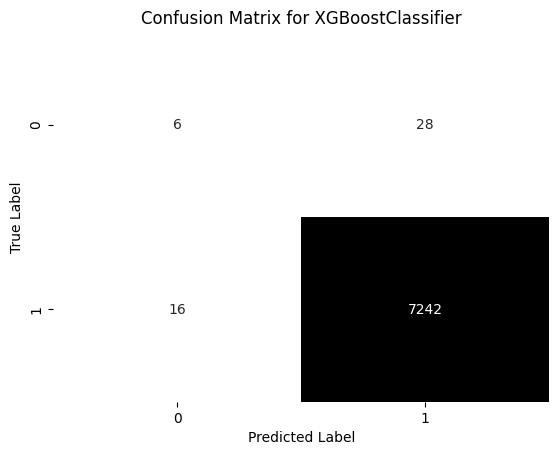

In [43]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.27      0.18      0.21        34
           1       1.00      1.00      1.00      7258

    accuracy                           0.99      7292
   macro avg       0.63      0.59      0.61      7292
weighted avg       0.99      0.99      0.99      7292



## **3. Using Stratified K-Fold with Scaled Weights XGBoost Classifier**

In [45]:
# grid search positive class weights with xgboost for imbalance classification
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# define model
model = XGBClassifier()
# define grid
weights = [1, 45, 55, 65, 70, 75, 85, 200]#[1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train_scaled, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.695126 using {'scale_pos_weight': 200}
0.677943 (0.082162) with: {'scale_pos_weight': 1}
0.680694 (0.089418) with: {'scale_pos_weight': 45}
0.683364 (0.076727) with: {'scale_pos_weight': 55}
0.686942 (0.083286) with: {'scale_pos_weight': 65}
0.686916 (0.077717) with: {'scale_pos_weight': 70}
0.689662 (0.076759) with: {'scale_pos_weight': 75}
0.693442 (0.076370) with: {'scale_pos_weight': 85}
0.695126 (0.083198) with: {'scale_pos_weight': 200}


In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smote=SMOTE()
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
smote_tomek = SMOTETomek()

In [47]:
# Create StratifiedKFold object.
kfold = 7
skf2 = StratifiedKFold(n_splits=kfold, shuffle=True, random_state=1)
lst_accu_stratified = []


xgb2 = XGBClassifier(scale_pos_weight=20, learning_rate=0.5, n_estimators=1000, min_child_weight = 10.0)#,

XX = X_train_scaled
yy = y_train.values

for train_index, test_index in skf2.split(XX, yy):
   x_train_fold, x_test_fold = XX[train_index], XX[test_index]
   y_train_fold, y_test_fold = yy[train_index], yy[test_index]
   smote_X_train, smote_y_train = smote_tomek.fit_resample(x_train_fold,y_train_fold)
   smote_X_train2, smote_y_train2 = smote.fit_resample(smote_X_train, smote_y_train)
   xgb2.fit(smote_X_train2, smote_y_train2)
   lst_accu_stratified.append(xgb2.score(x_test_fold, y_test_fold))
  
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
#print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.9947204223662107, 0.9949604031677466, 0.9940004799616031, 0.9937590014402304, 0.9939990398463754, 0.9942390782525204, 0.9949591934709554]

Maximum Accuracy That can be obtained from this model is: 99.49604031677465 %

Minimum Accuracy: 99.37590014402305 %


In [48]:
y_pred2 = xgb2.predict(X_test_scaled)

In [49]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)

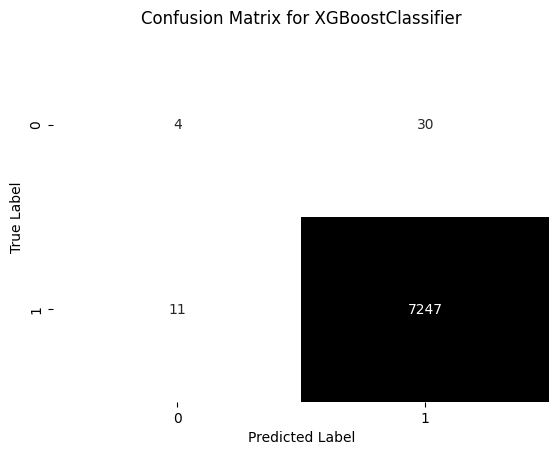

In [50]:
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [51]:
from sklearn.metrics import classification_report, accuracy_score

classification_rep = classification_report(y_test, y_pred2)
print('\nClassification Report for XGBoostClassifier:')
print(classification_rep)


Classification Report for XGBoostClassifier:
              precision    recall  f1-score   support

           0       0.27      0.12      0.16        34
           1       1.00      1.00      1.00      7258

    accuracy                           0.99      7292
   macro avg       0.63      0.56      0.58      7292
weighted avg       0.99      0.99      0.99      7292



## **4. Applying XGBoost on PCA Components of Balanced SMOTE_TOMEK Data**

In [52]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

smote_X, smote_y = smote_tomek.fit_resample(X,y)

scaler = StandardScaler()
X_scaled= scaler.fit_transform(smote_X)

pca = PCA(5)

# Apply PCA to the data, transforming it to a new space of principal components
# 'x' should be your feature matrix (2D array or DataFrame)
pca_data = pca.fit_transform(X_scaled)

# Create a DataFrame to store the transformed data (principal components)
# Each column corresponds to a principal component (e.g., Principal Component 1, Principal Component 2, etc.)
pca_df = pd.DataFrame(pca_data, columns=[f'Principal Component {i+1}' for i in range(pca_data.shape[1])])

In [53]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, smote_y, test_size=0.2, random_state=42)

In [54]:
xg = XGBClassifier(n_estimators=500, max_depth=3)
xg.fit(X_train_pca, y_train_pca)
y_pred_pca = xg.predict(X_test_pca)
score = accuracy_score(y_test_pca, y_pred_pca)
print("Score is "+ str(score))


matrix = confusion_matrix(y_test_pca, y_pred_pca)
print(matrix)
score = accuracy_score(y_test_pca, y_pred_pca)
print(score)

Score is 0.9592385681771156
[[6957  254]
 [ 337 6951]]
0.9592385681771156


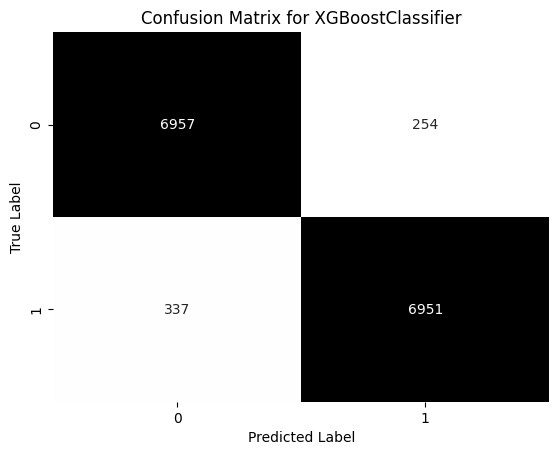

In [55]:
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greys', cbar=False)
plt.title('Confusion Matrix for XGBoostClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [56]:
report = classification_report(y_test_pca, y_pred_pca)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7211
           1       0.96      0.95      0.96      7288

    accuracy                           0.96     14499
   macro avg       0.96      0.96      0.96     14499
weighted avg       0.96      0.96      0.96     14499



#### Finally, imbalaned data problem has solved, by applying PCA on resampled data and applying XGBoost on PCA data.